In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

data = pd.read_csv('../sql/K6_UNEMPLOYED_RESIDENTS_BY_MARITAL_STATUS_AND_SEX.csv')
# data = pd.read_csv('../sql/K15T_UNEMPLOYED_RESIDENTS_BY_PREVIOUS_OCCUPATION_AND_SEX.csv')

In [2]:
data.nunique()

# Drop columns with only 1 unique value
col_only_single_unique = [col for col in data.columns if data[col].nunique()==1]
data.drop(col_only_single_unique, axis =1, inplace = True)
data.head()

,Marital_Status,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Gender
0,Single,21.4,22.8,22.0,24.1,22.1,25.0,28.4,24.3,19.2,19.4,19.3,Male
1,Married,18.1,18.8,21.7,22.2,22.0,21.4,29.6,27.0,22.1,19.4,21.3,Male
2,Widowed / Divorced,2.0,2.7,2.4,3.0,2.3,2.1,4.0,3.9,2.8,2.6,2.9,Male
3,Single,19.7,19.6,22.4,22.3,20.4,23.6,30.0,26.0,18.6,20.0,15.7,Female
4,Married,17.6,17.0,20.7,19.9,18.1,21.9,24.7,26.1,20.4,18.8,17.9,Female


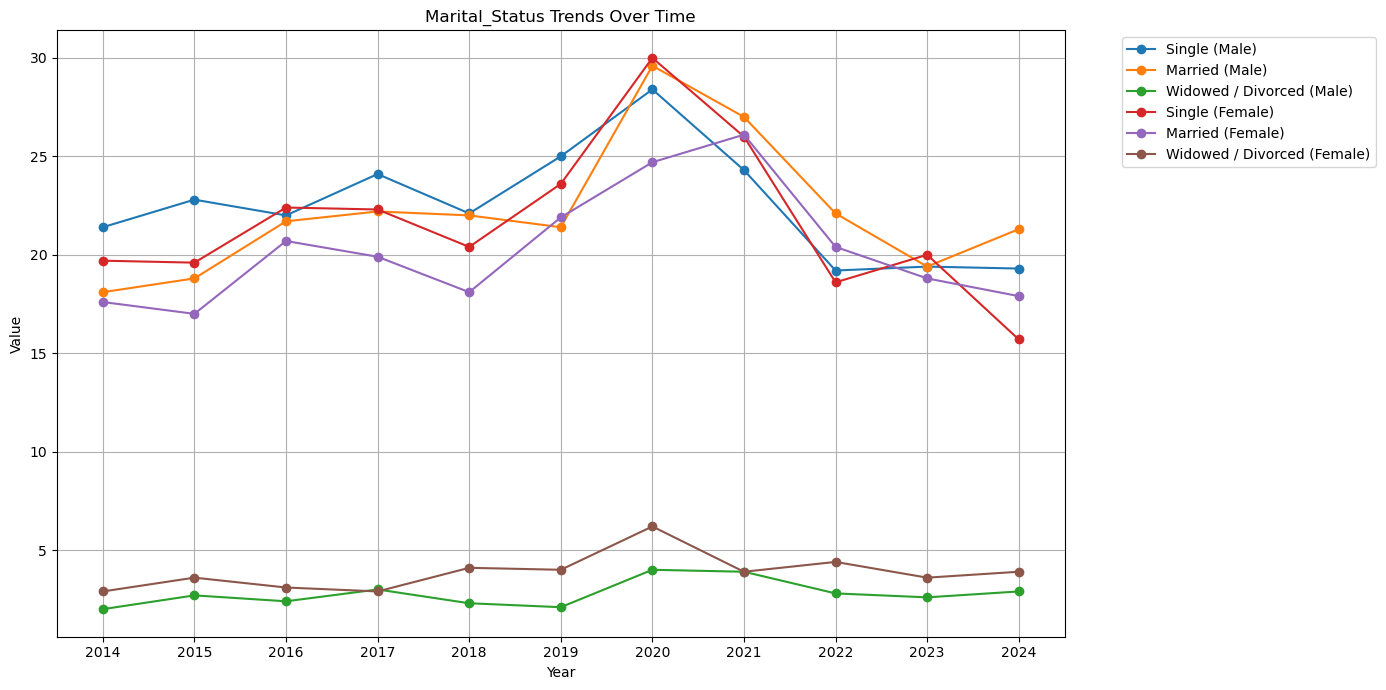

In [3]:
df = data.copy()
df_cat_list = [col for col in df.columns if df[col].dtype == object]
df['Label'] = df[df_cat_list[0]] + ' (' + df[df_cat_list[1]] + ')'

df_melted = df.melt(id_vars=['Label'], value_vars=[str(year) for year in range(2014, 2025)],
                    var_name='Year', value_name='Value')

plt.figure(figsize=(14, 7))
for label in df_melted['Label'].unique():
    subset = df_melted[df_melted['Label'] == label]
    plt.plot(subset['Year'], subset['Value'], marker='o', label=label)

plt.title(f'{df_cat_list[0]} Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

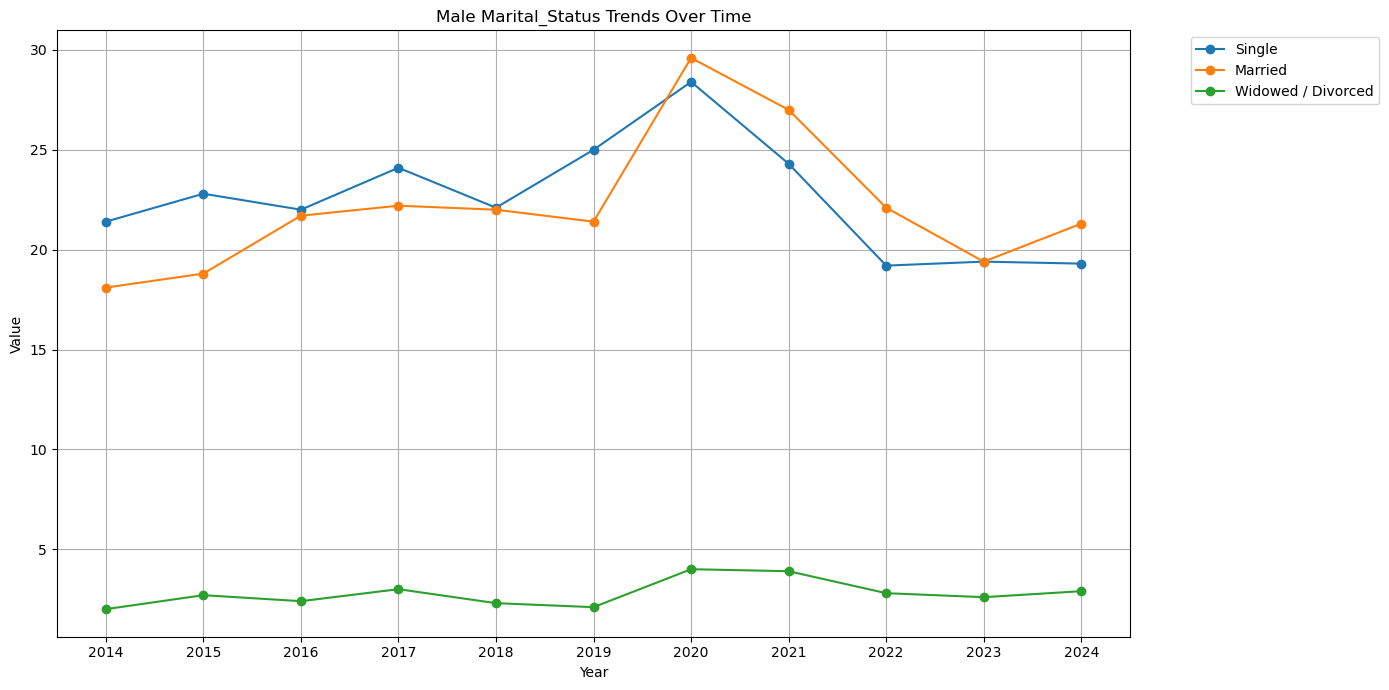

In [4]:
df_melted_male = data[data['Gender']=='Male'].drop('Gender', axis=1).melt(id_vars=[df_cat_list[0]], value_vars=[str(year) for year in range(2014, 2025)],
                    var_name='Year', value_name='Value')
# print(df_melted_male)

plt.figure(figsize=(14, 7))
for occupation in df_melted_male[df_cat_list[0]].unique():
    subset = df_melted_male[df_melted_male[df_cat_list[0]] == occupation]
    plt.plot(subset['Year'], subset['Value'], marker='o', label=occupation)

plt.title(f'Male {df_cat_list[0]} Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

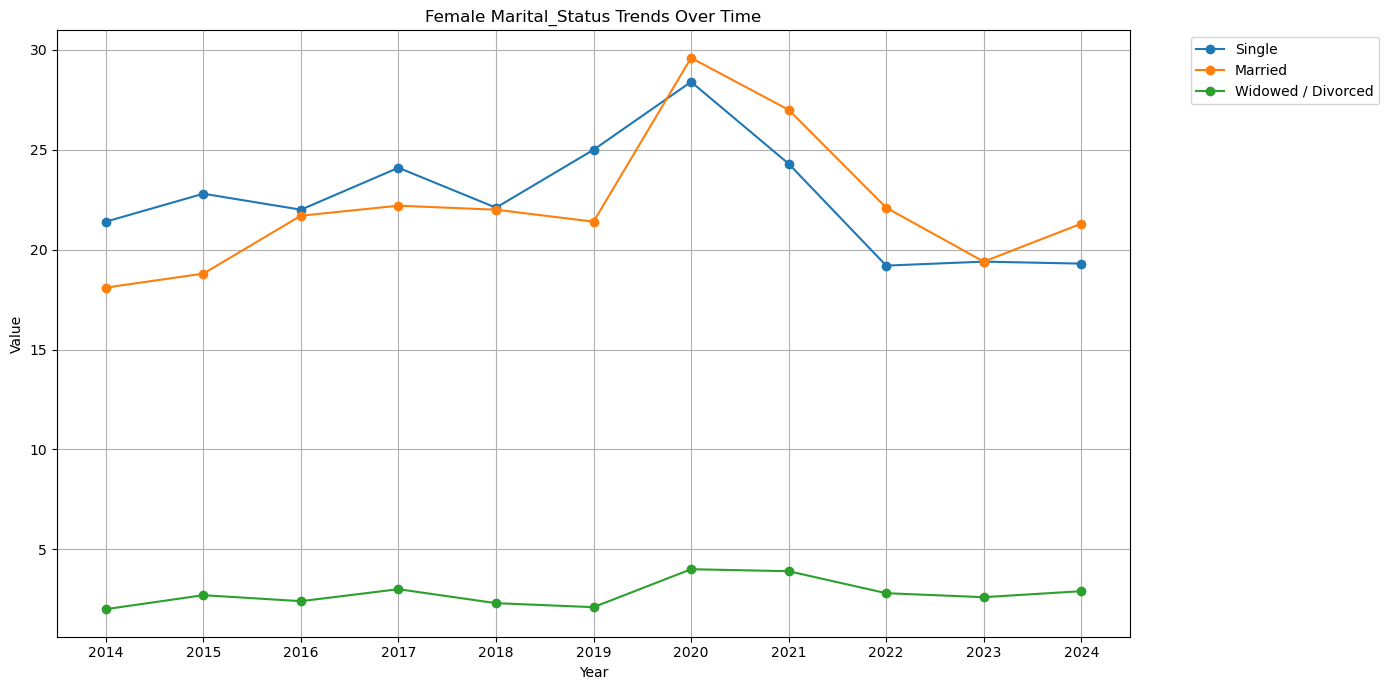

In [5]:
df_melted_female = data[data['Gender']=='Female'].drop('Gender', axis=1).melt(id_vars=[df_cat_list[0]], value_vars=[str(year) for year in range(2014, 2025)],
                    var_name='Year', value_name='Value')
# print(df_melted_male)

plt.figure(figsize=(14, 7))
for occupation in df_melted_male[df_cat_list[0]].unique():
    subset = df_melted_male[df_melted_male[df_cat_list[0]] == occupation]
    plt.plot(subset['Year'], subset['Value'], marker='o', label=occupation)

plt.title(f'Female {df_cat_list[0]} Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
## Convert to long form

cat_list = [col for col in data.columns if data[col].dtype == object]

df_long = data.melt(
    id_vars=cat_list,
    value_vars=[str(year) for year in range(2014, 2025)],
    var_name="Year",
    value_name="Count"
)
df_long.head()

,Marital_Status,Gender,Year,Count
0,Single,Male,2014,21.4
1,Married,Male,2014,18.1
2,Widowed / Divorced,Male,2014,2.0
3,Single,Female,2014,19.7
4,Married,Female,2014,17.6


In [7]:
print(df_long.duplicated().sum())

0


In [8]:
df_long.nunique()

Marital_Status     3
Gender             2
Year              11
Count             53
dtype: int64

In [9]:
df_long.fillna(0,inplace = True)

In [10]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marital_Status  66 non-null     object 
 1   Gender          66 non-null     object 
 2   Year            66 non-null     object 
 3   Count           66 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.2+ KB


### Univariate Analysis (Single Variable)

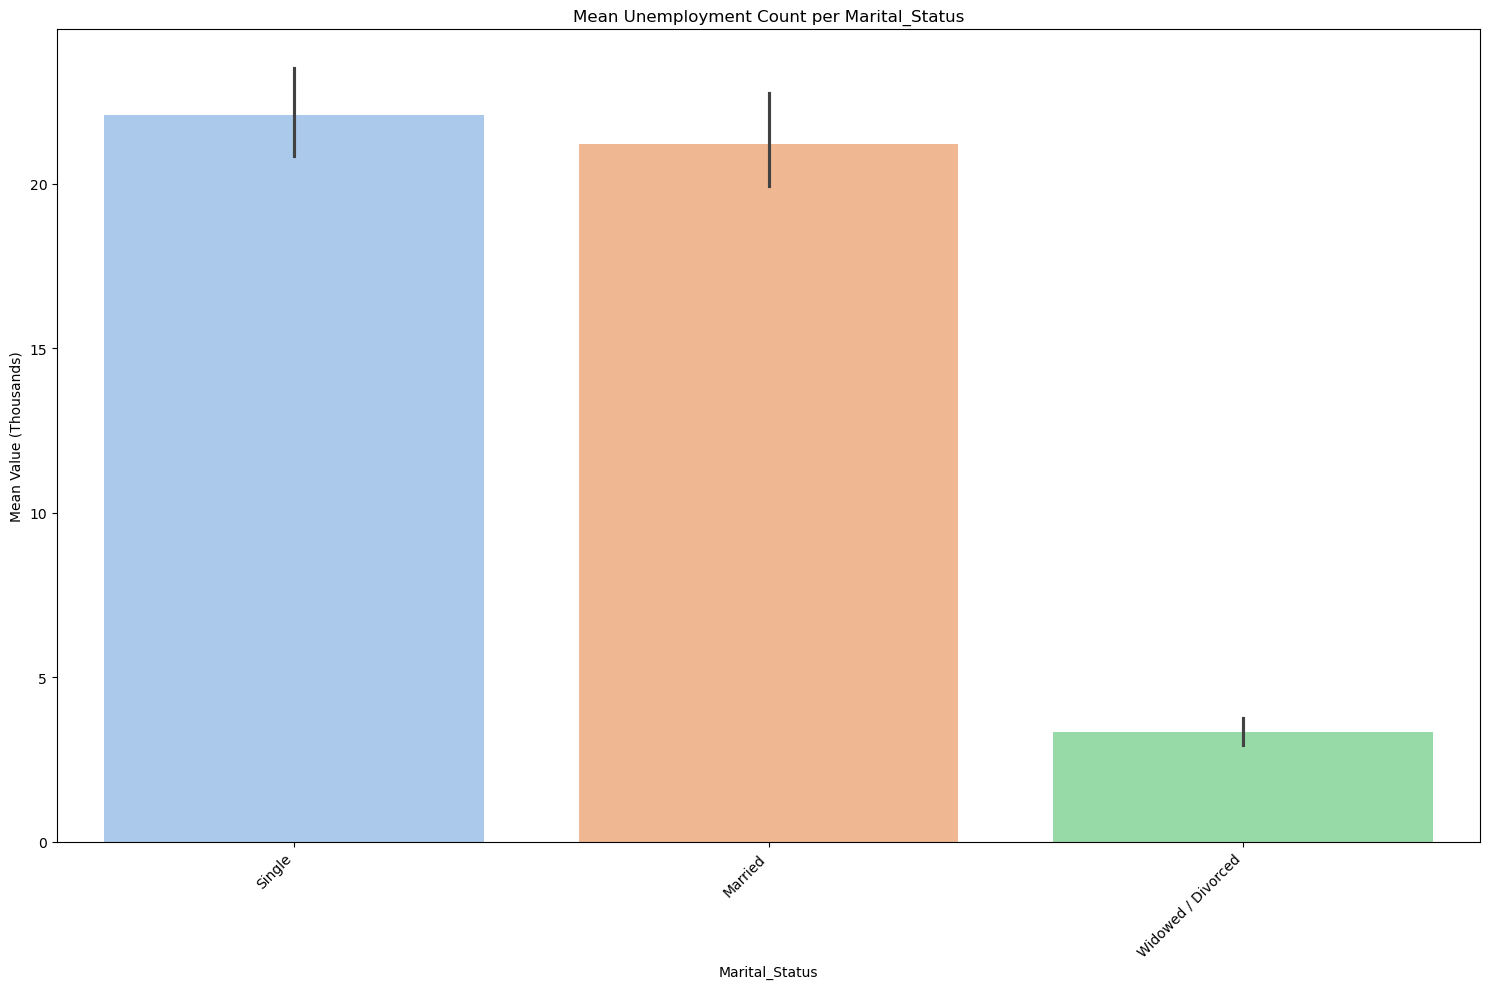

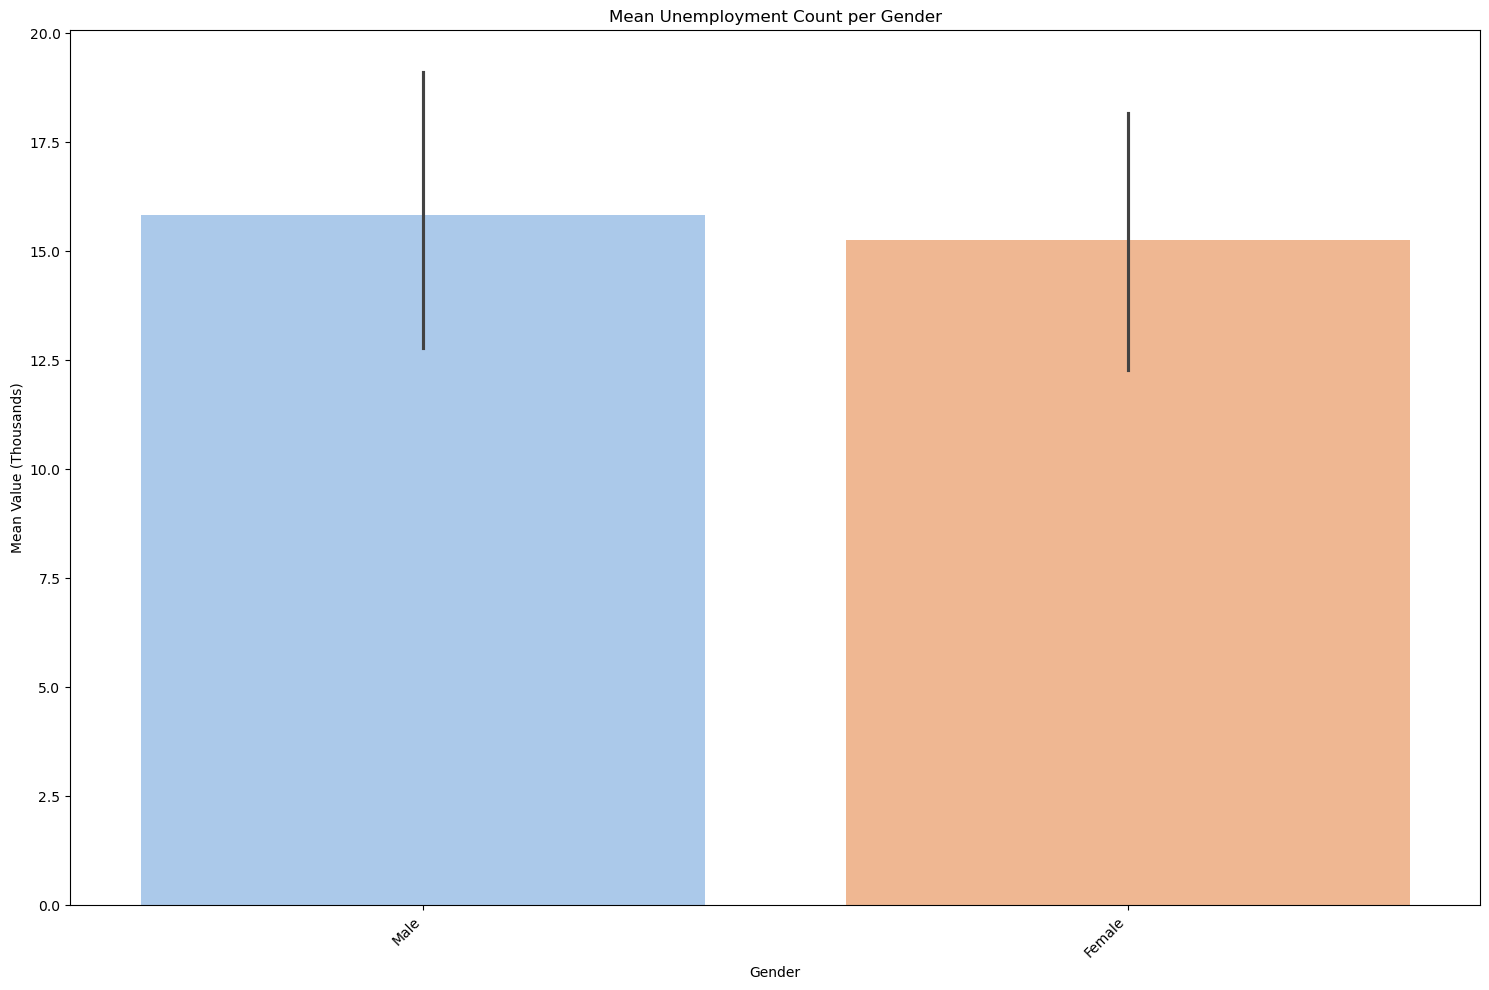

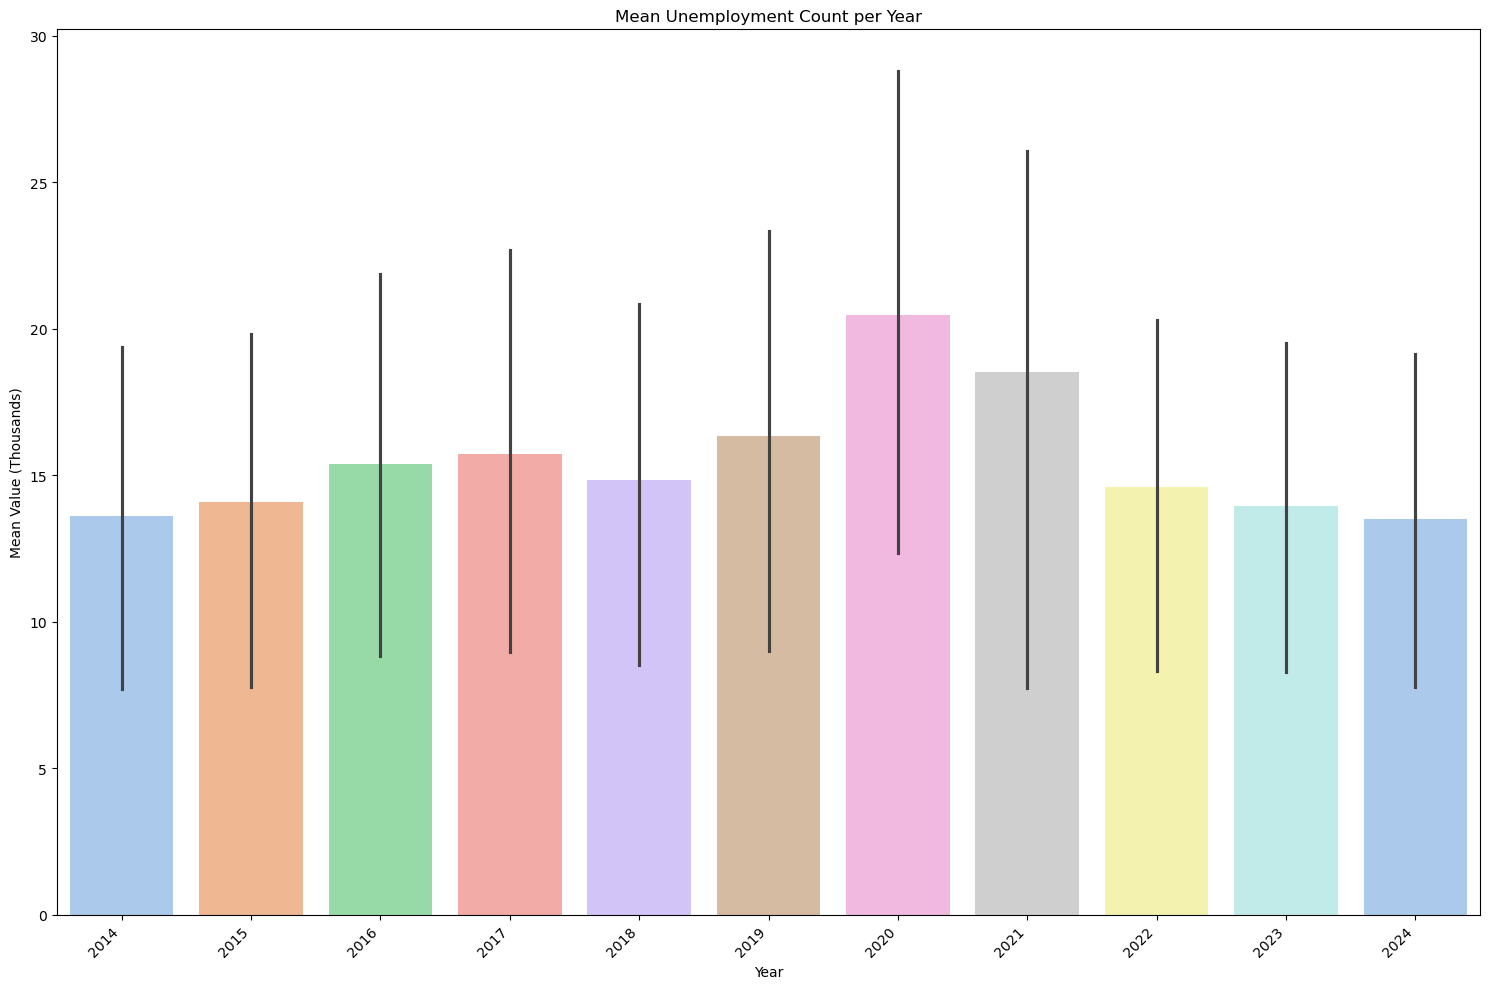

In [11]:

var_list = cat_list + ['Year']

for col in var_list:
    # y-axis to be Count

    ###-------------------------------------------------------------------####
    ### ---- Bar Plot – For categorical variables (mean of numerical) --- ####
    ###-------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.barplot(x=col, y='Count',  data=df_long, estimator='mean',  legend=False, hue=col, palette='pastel')
    plt.title(f"Mean Unemployment Count per {col}")
    plt.xlabel(col) 
    plt.ylabel("Mean Value (Thousands)")

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()



--- Mean Count by Marital_Status ---
Marital_Status
Single                22.10
Married               21.21
Widowed / Divorced     3.33
Name: Count, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2580\2127108450.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Count', data=df_long, palette='pastel')


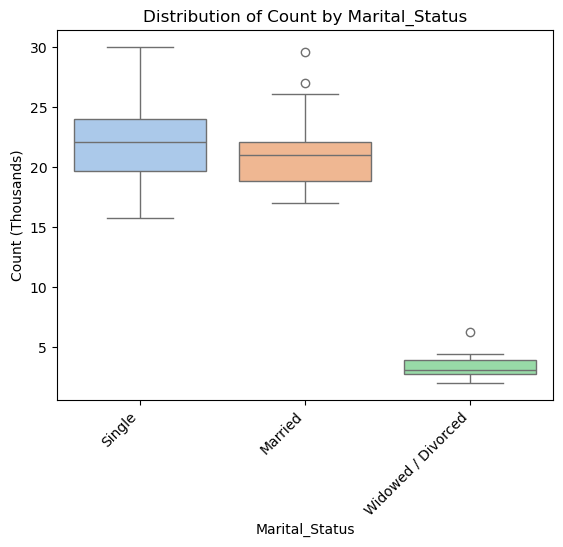

C:\Users\user\AppData\Local\Temp\ipykernel_2580\2127108450.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=df_long, palette='pastel')


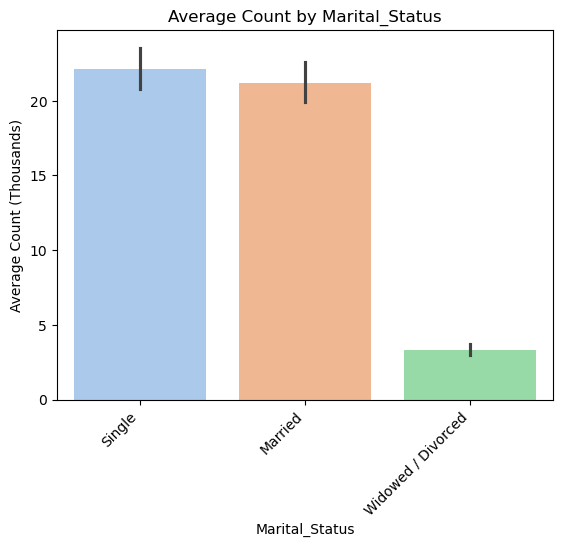


--- Mean Count by Gender ---
Gender
Male      15.83
Female    15.27
Name: Count, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2580\2127108450.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Count', data=df_long, palette='pastel')


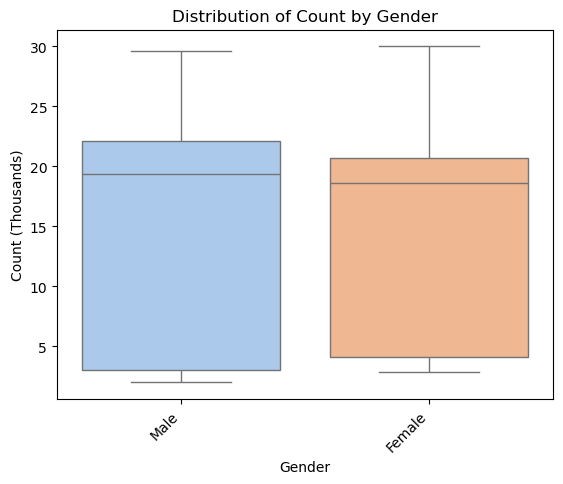

C:\Users\user\AppData\Local\Temp\ipykernel_2580\2127108450.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=df_long, palette='pastel')


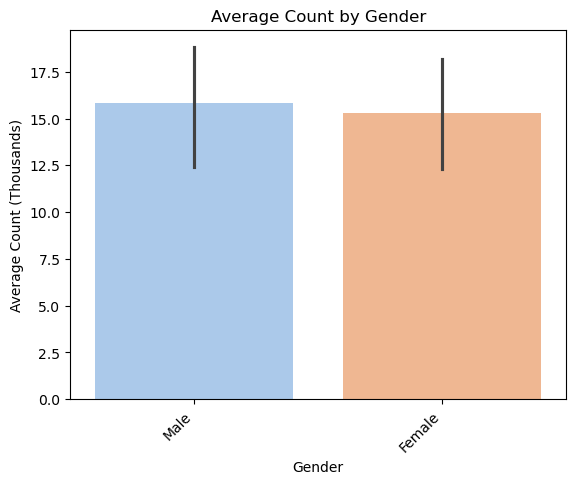

C:\Users\user\AppData\Local\Temp\ipykernel_2580\2127108450.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Count', data=df_long, palette='pastel')



--- Mean Count by Year ---
Year
2020    20.48
2021    18.53
2019    16.33
2017    15.73
2016    15.38
2018    14.83
2022    14.58
2015    14.08
2023    13.97
2014    13.62
2024    13.50
Name: Count, dtype: float64


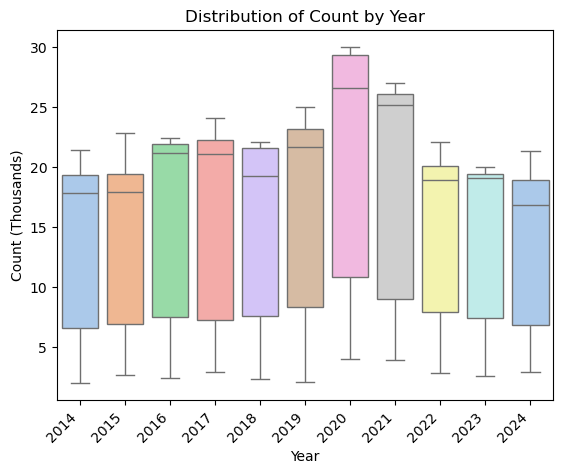

C:\Users\user\AppData\Local\Temp\ipykernel_2580\2127108450.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=df_long, palette='pastel')


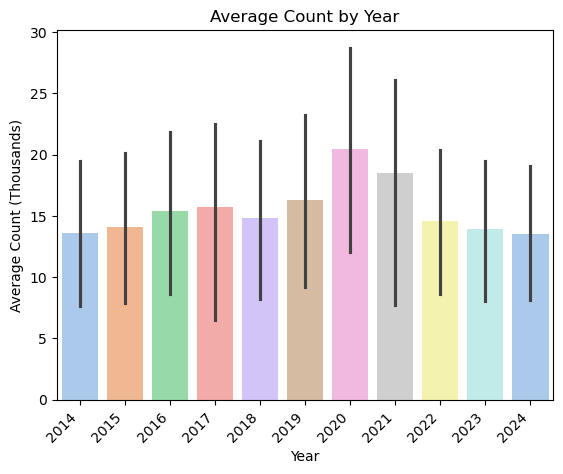

In [12]:
# Groupby

for col in var_list:
    #df_grouped = df_long.groupby(col, as_index=False)['Count'].mean()
    #df_grouped = df_long.groupby(col)['Count'].mean().reset_index()

    print(f"\n--- Mean Count by {col} ---")
    print(df_long.groupby(col)['Count'].mean().sort_values(ascending=False).round(2))

    # Boxplot to visualize distribution of Count by Col
    #sns.boxplot(x=col, y='Count', data=df_long, hue=col, palette='pastel')
    sns.boxplot(x=col, y='Count', data=df_long, palette='pastel')
    # Overlay mean using pointplot
    # sns.pointplot(x=col, y='Count', data=df_long, estimator='mean', 
    #               color='red', markers='D', linestyles='', scale=1.2, errorbar=None)
    plt.title(f'Distribution of Count by {col}')
    plt.xlabel(col)
    plt.ylabel('Count (Thousands)')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

    # Or Barplot (mean Count by Col)
    # sns.barplot(x=col, y='Count', data=df_long,  hue=col, palette='pastel')
    sns.barplot(x=col, y='Count', data=df_long, palette='pastel')
    plt.title(f'Average Count by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Count (Thousands)')
    plt.xticks(rotation=45, ha='right')  
    plt.show()


### Bivariate Analysis (Two Variables)

In [13]:
df_long.nunique()

Marital_Status     3
Gender             2
Year              11
Count             53
dtype: int64

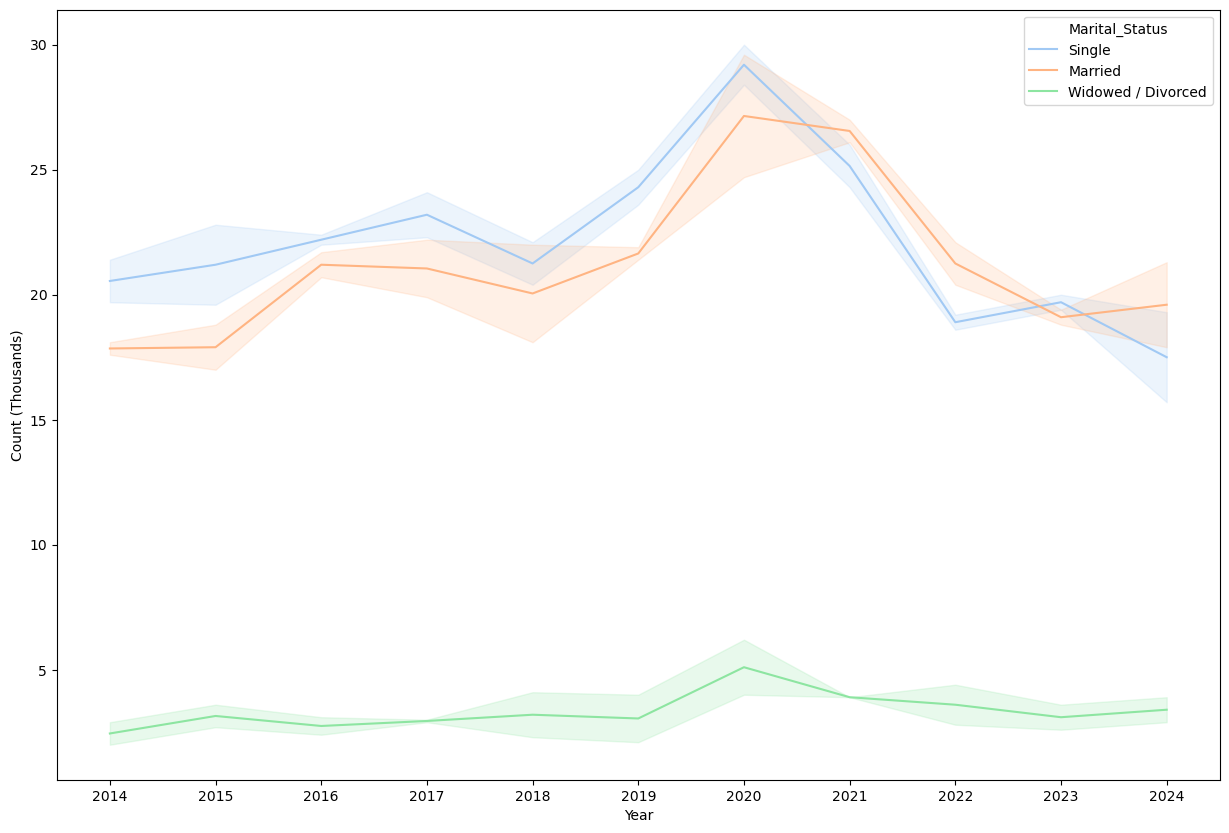

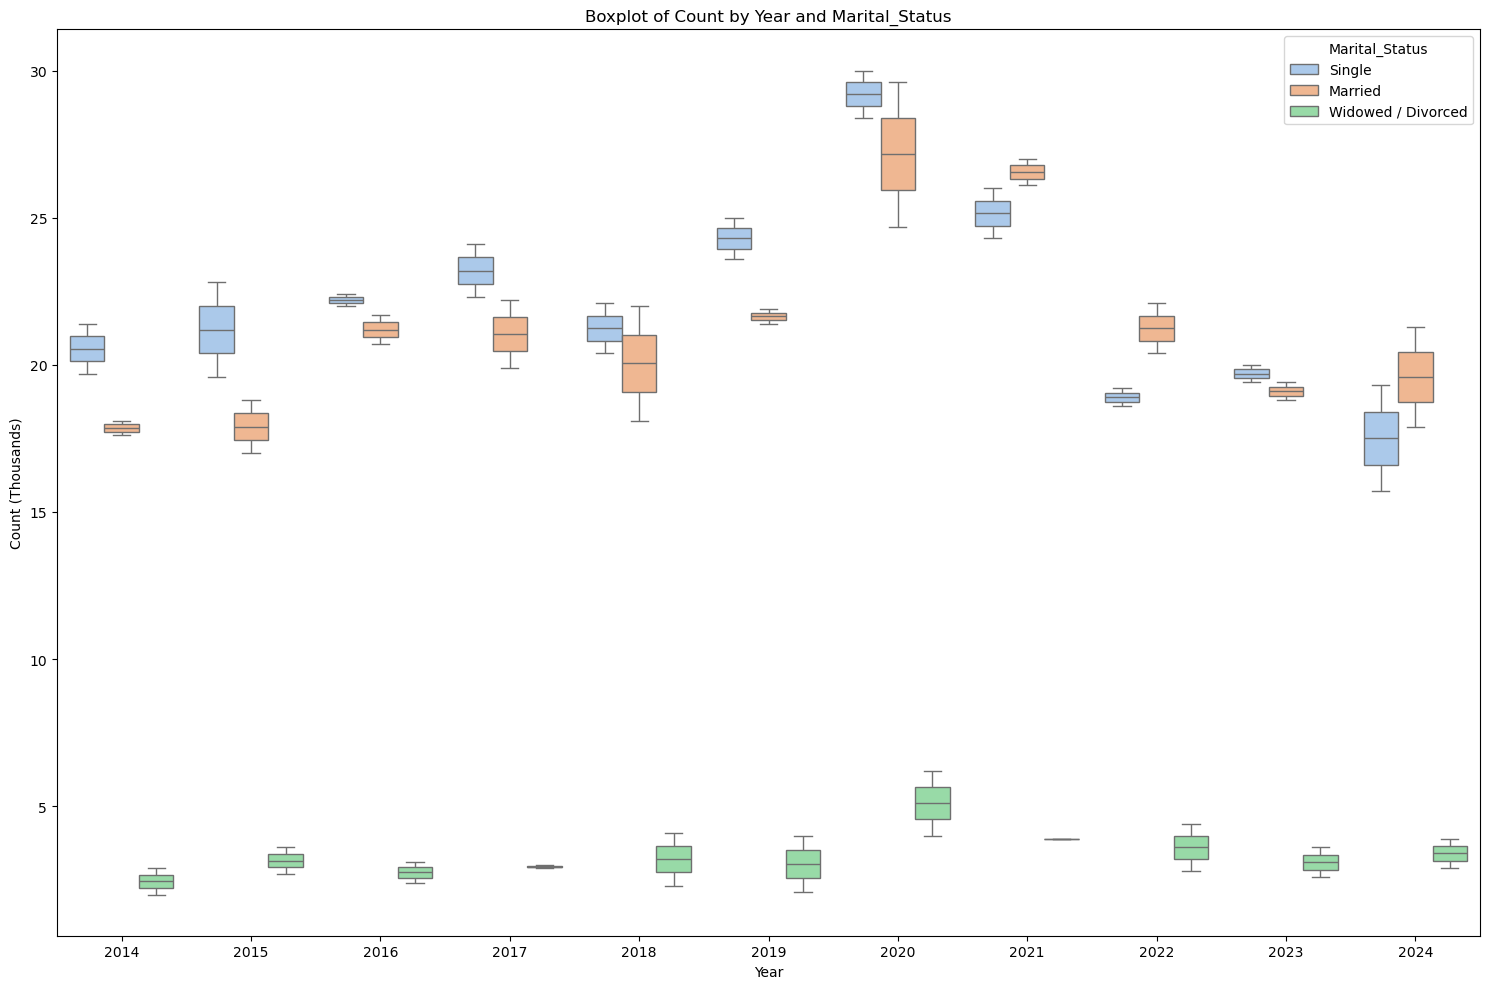

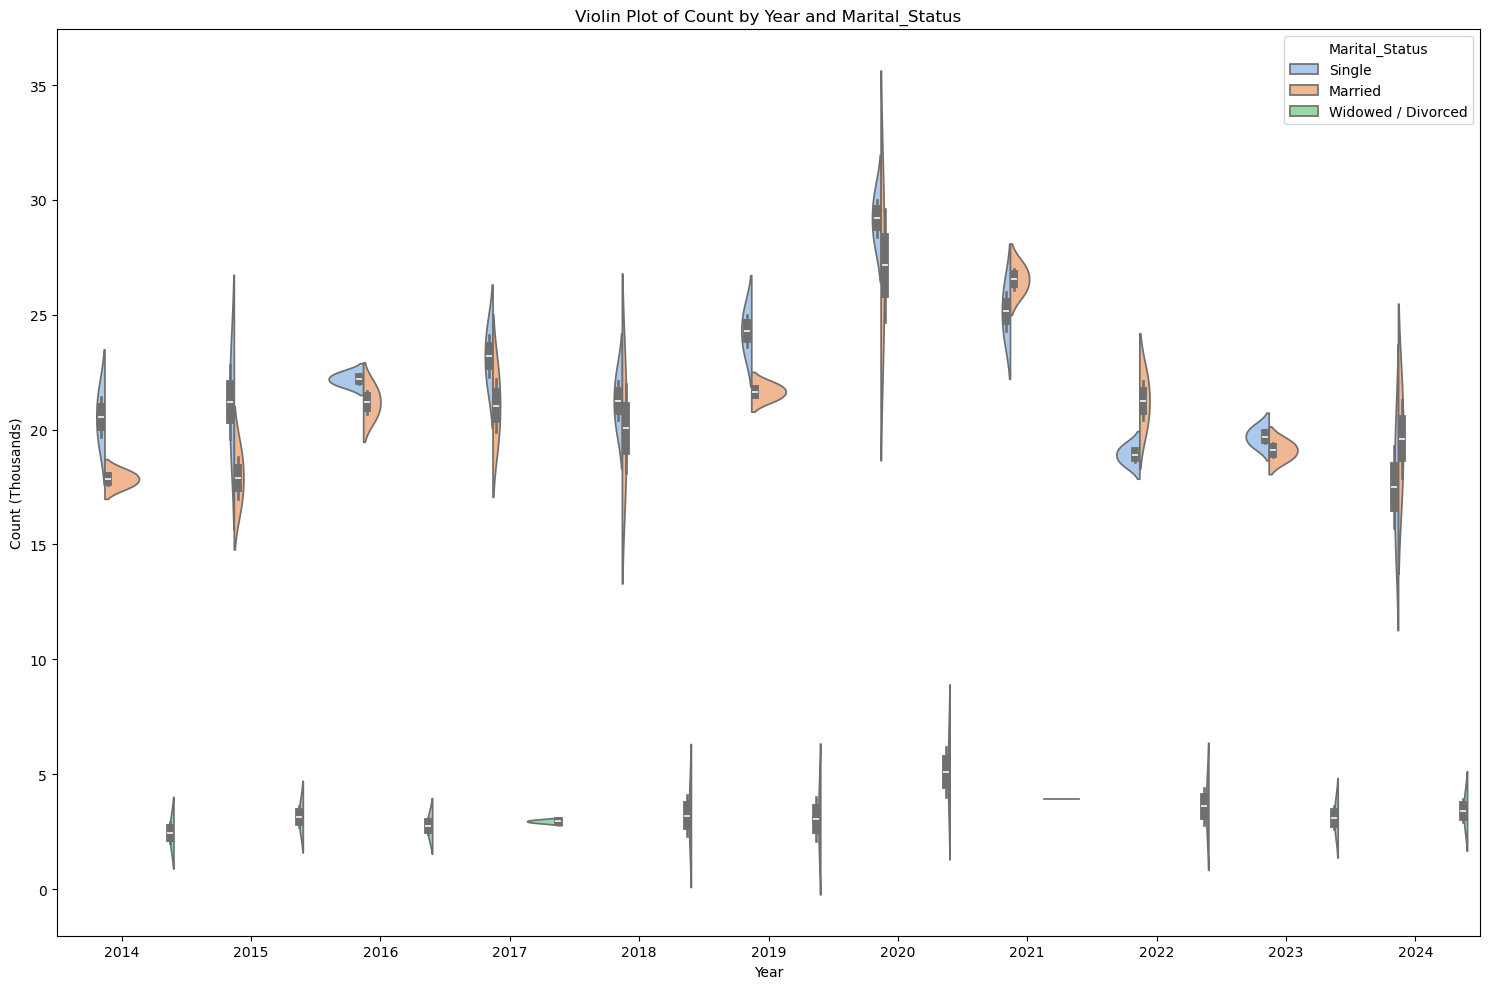

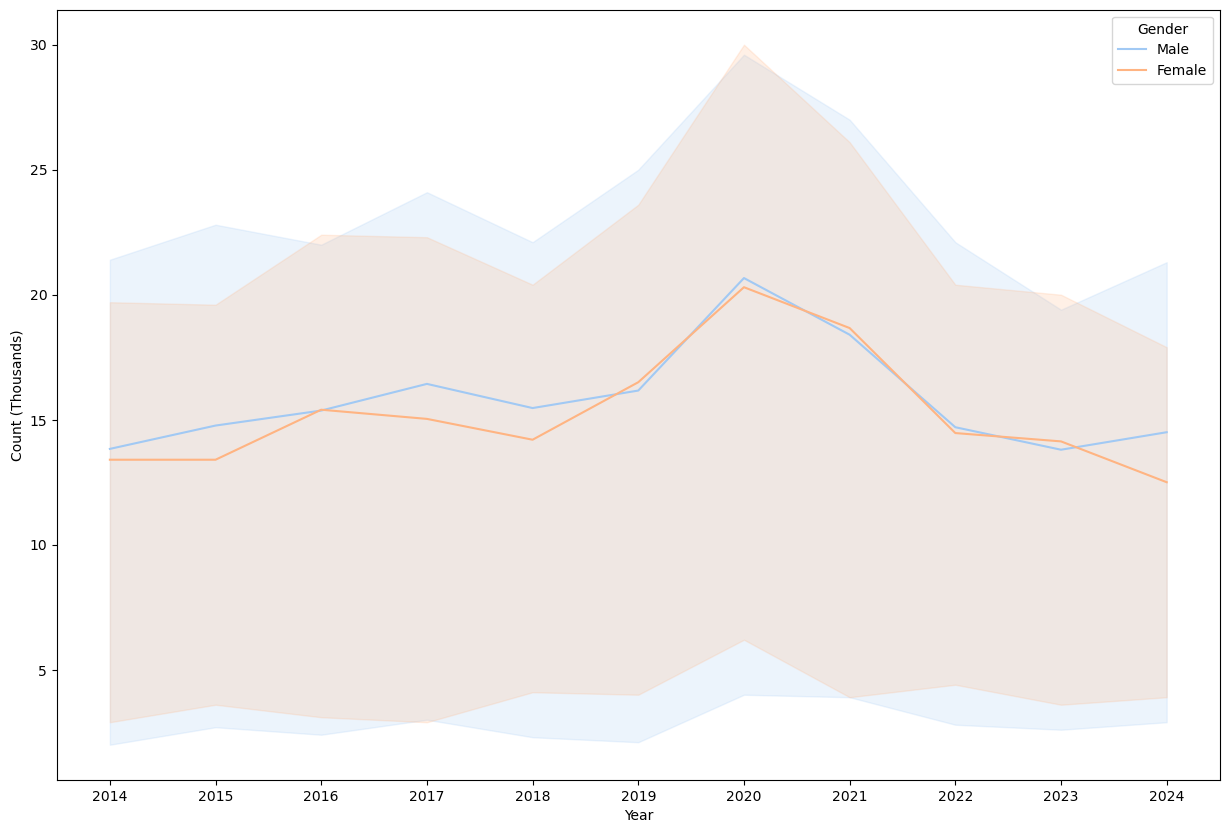

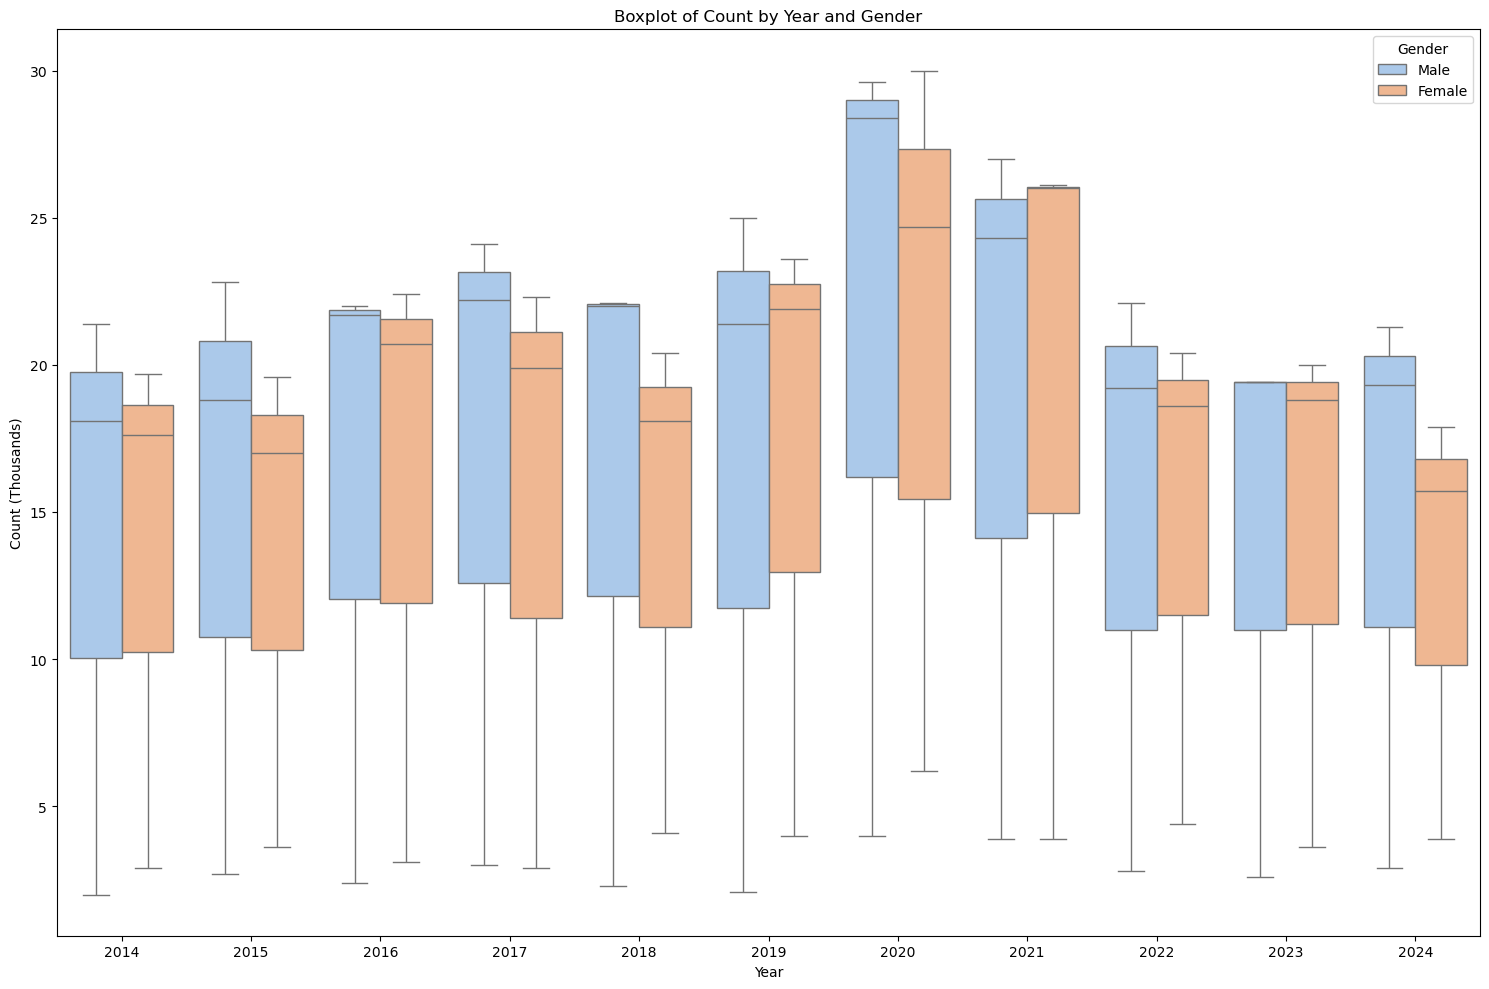

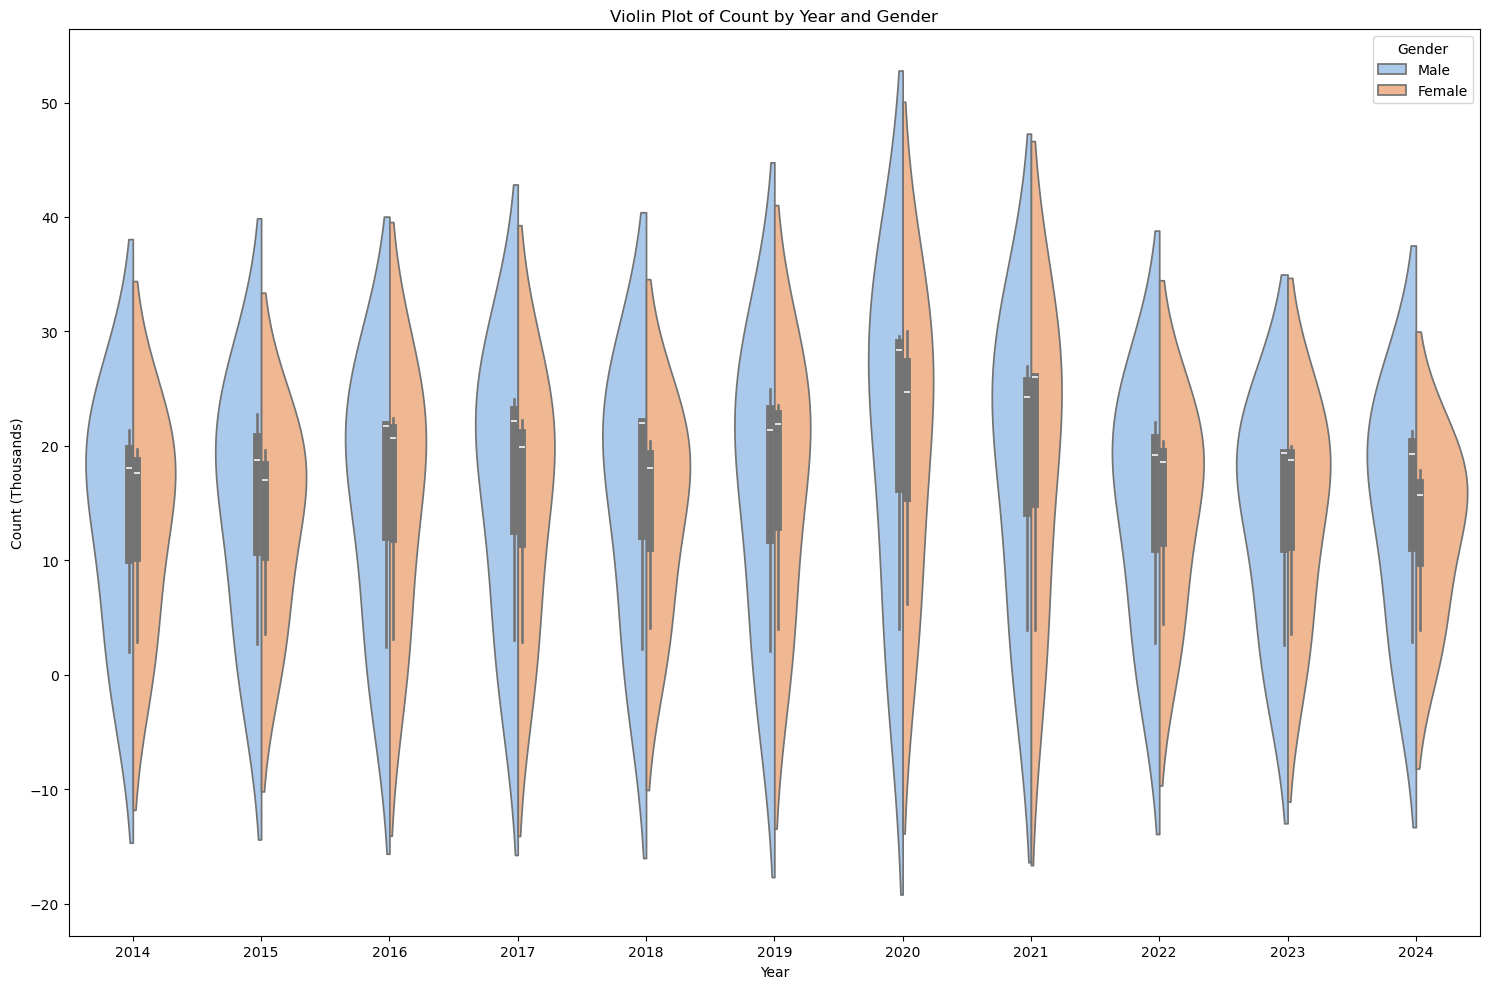

In [14]:
for i, col in enumerate(cat_list):
    # x-axis to be Year
    # y-axis to be Count

    ###---------------------------------------------------------------------------####
    ### ---- Line Plot – Shows mean trend over years for each category in col --- ####
    ###---------------------------------------------------------------------------####

    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel', estimator='mean')
    plt.xlabel('Year')
    plt.ylabel("Count (Thousands)")
    plt.show()

    ###---------------------------------------------------------------------------####
    ### ---- Box Plot – Shows trend over years for each category in col --- ####
    ###---------------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel')
    plt.xlabel('Year')
    plt.ylabel('Count (Thousands)')
    plt.title(f'Boxplot of Count by Year and {col}')
    #plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
    plt.tight_layout()
    plt.show()


    ###---------------------------------------------------------------------------####
    ### ---- Violin Plot – Shows distribution over years for each category in col --- ####
    ###---------------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.violinplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel', split=True)
    plt.xlabel('Year')
    plt.ylabel('Count (Thousands)')
    plt.title(f'Violin Plot of Count by Year and {col}')
    plt.tight_layout()
    plt.show()

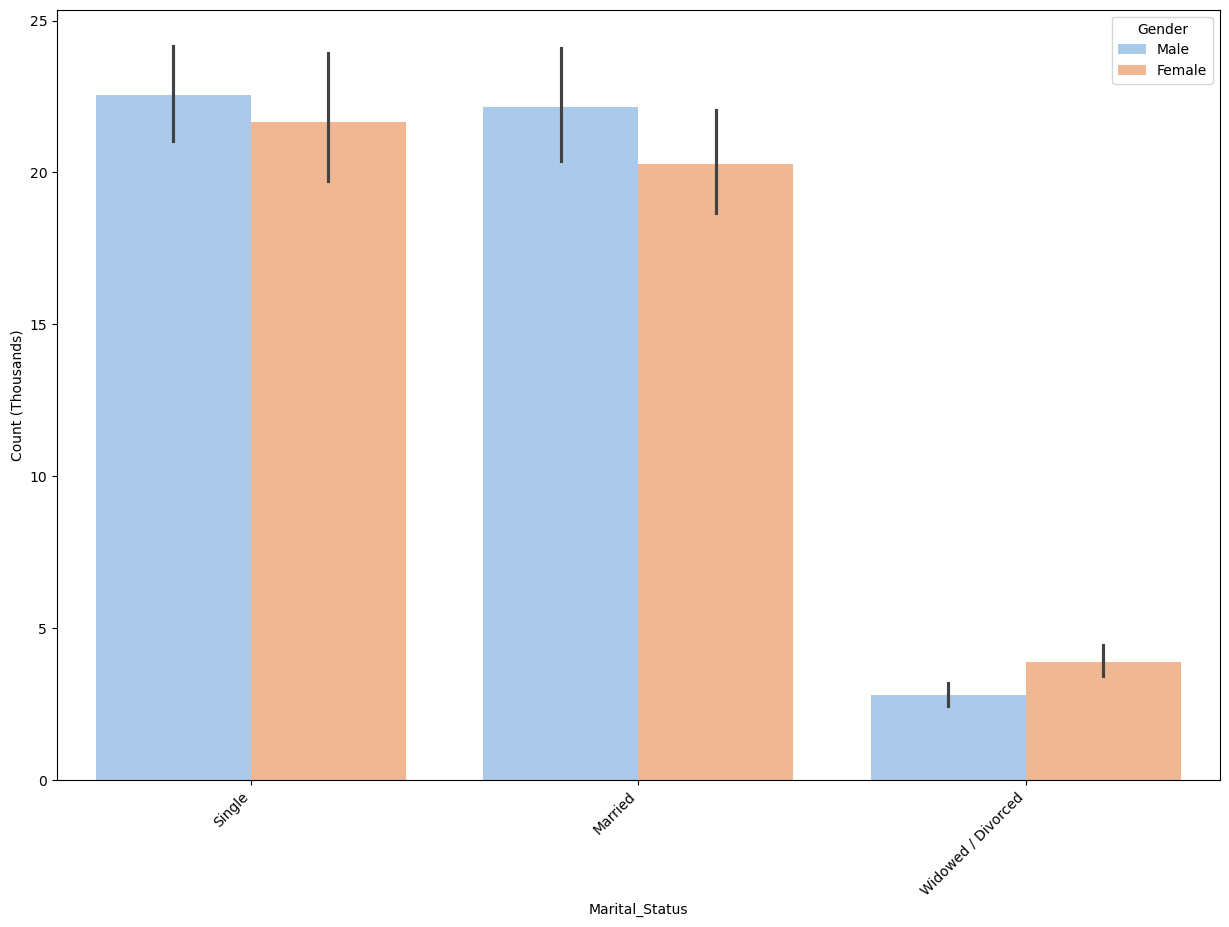

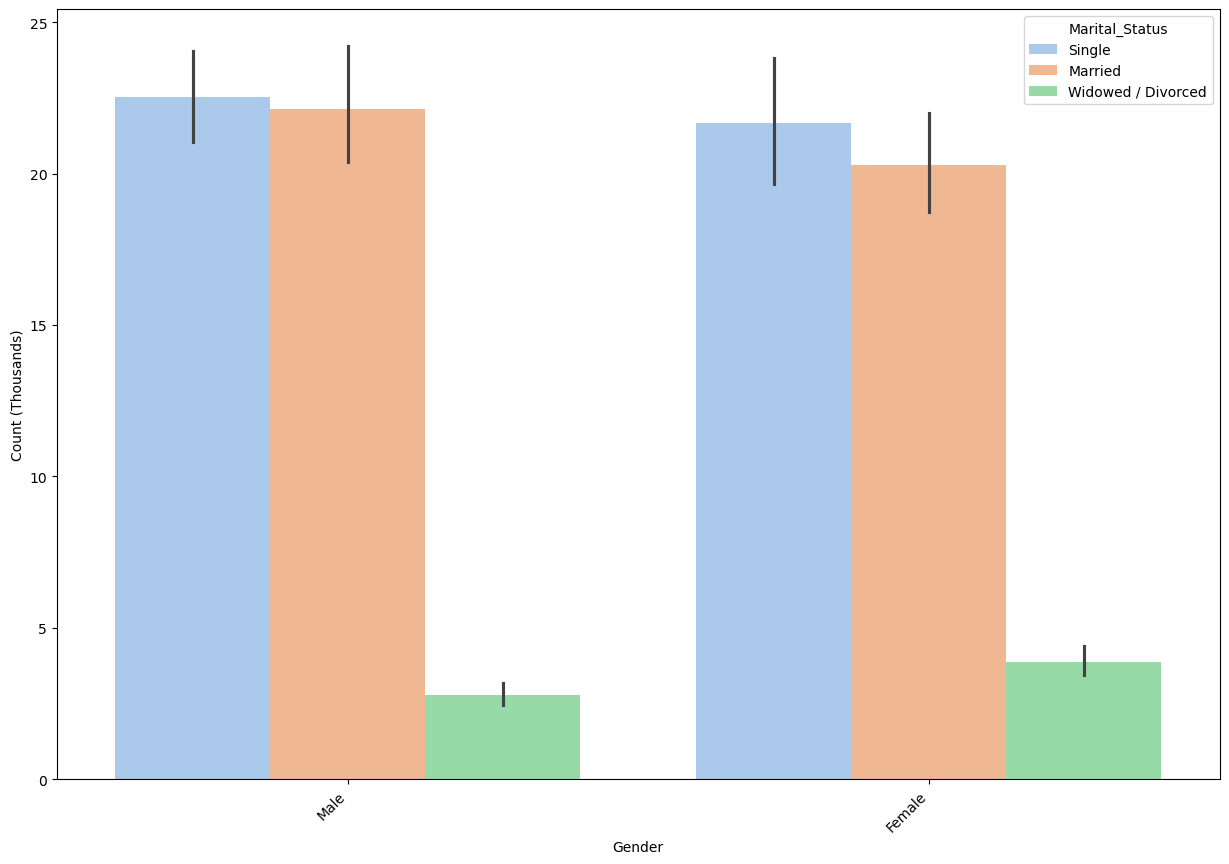

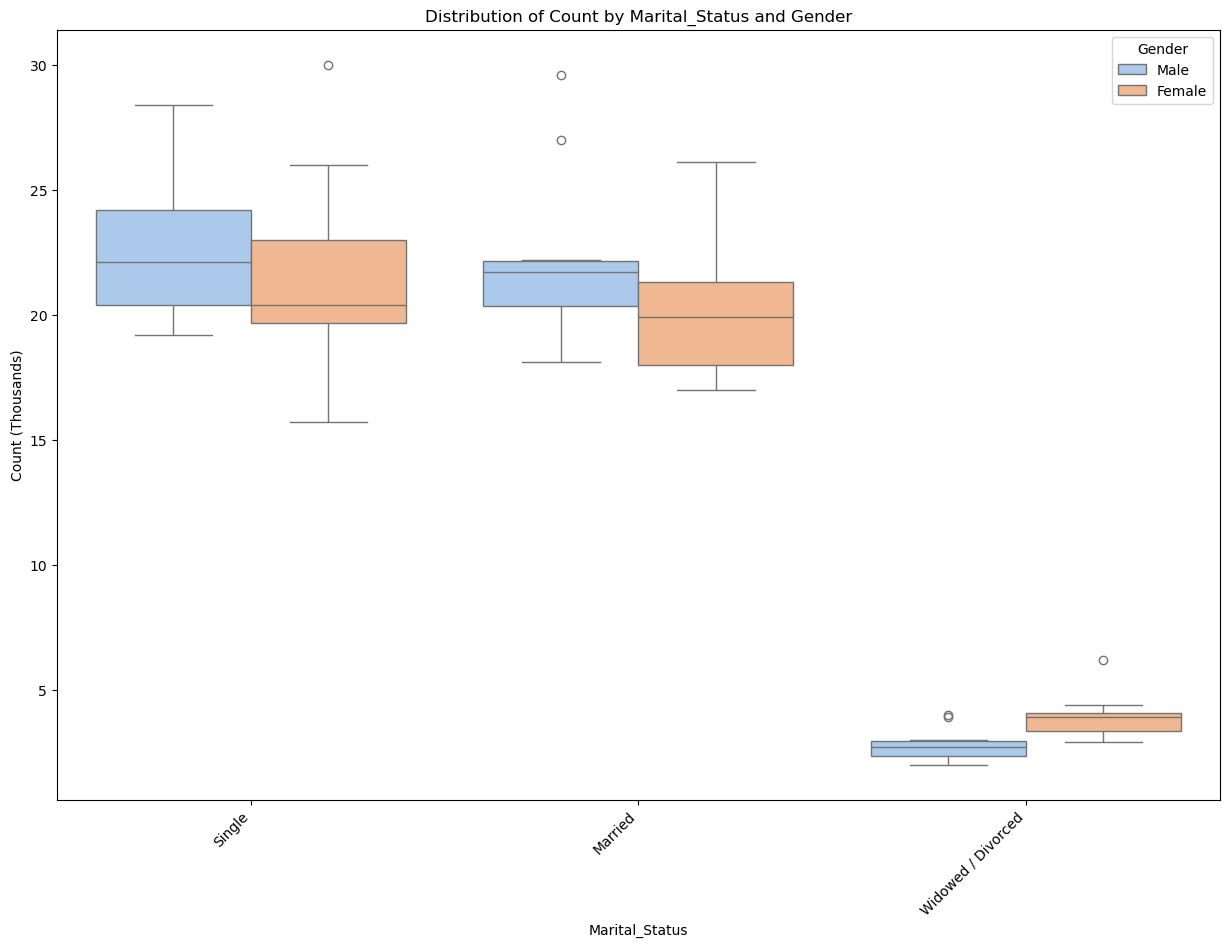

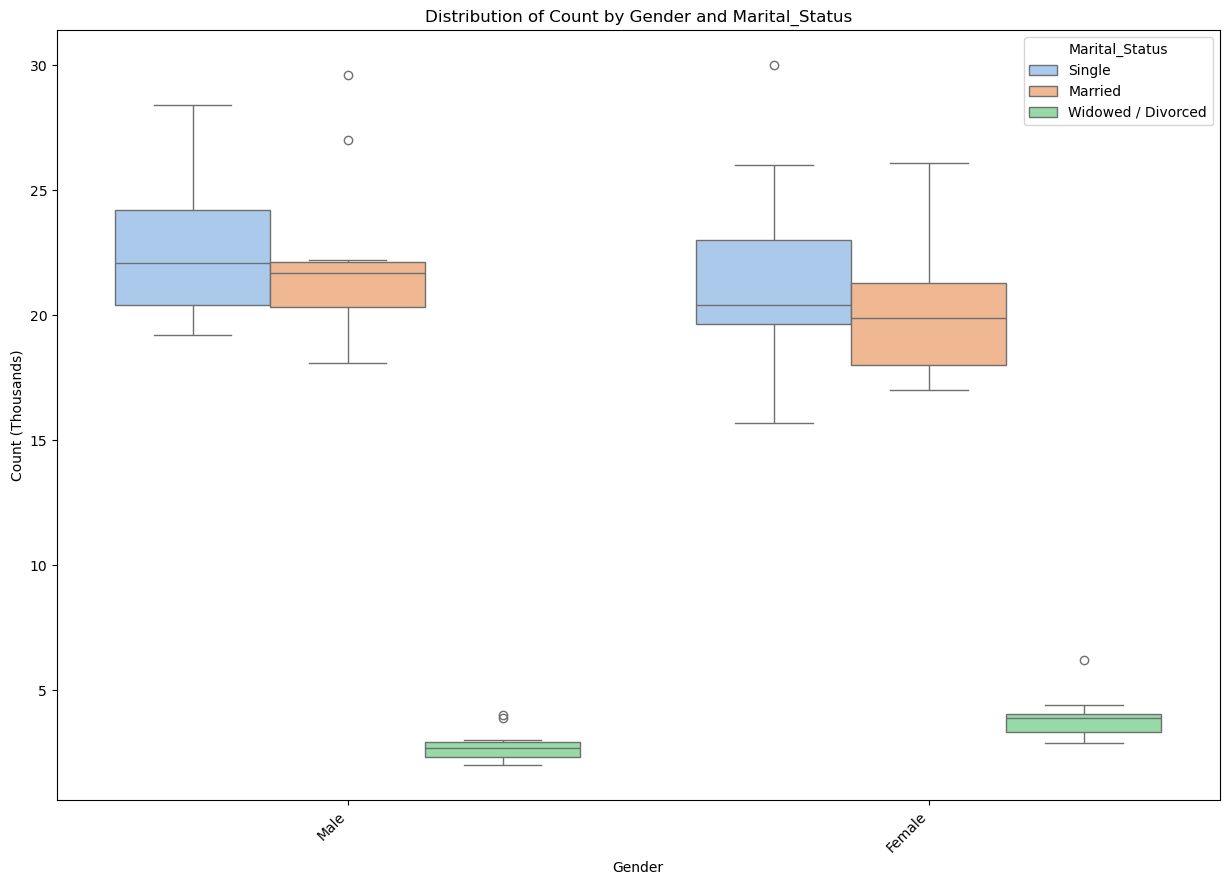

In [15]:
if len(cat_list)>1:
    combo_list = list(combinations(cat_list, 2))  
    # print(combo_list)


    for combo in combo_list:
        ###-----------------------------------------------------------------------------------------####
        ### ---- Bar Plots – Show mean count comparisons between pairs of categorical variables --- ####
        ###-----------------------------------------------------------------------------------------####

        plt.figure(figsize=(15, 10))
        sns.barplot(x=combo[0], y='Count', hue=combo[1], data=df_long, palette='pastel', estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(combo[0])
        plt.ylabel("Count (Thousands)")
        plt.show()

        plt.figure(figsize=(15, 10))
        sns.barplot(x=combo[1], y='Count', hue=combo[0], data=df_long, palette='pastel', estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(combo[1])
        plt.ylabel("Count (Thousands)")
        plt.show()

        ###-----------------------------------------------------------------------------------------####
        ### ---- Box Plot – Shows distribution of Count by the two columns --- ####
        ###-----------------------------------------------------------------------------------------####
    
        df_grouped = df_long.groupby([combo[0], combo[1]], as_index=False)['Count'].mean()
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(x=combo[0], y='Count', hue=combo[1], data=df_long, palette='pastel')
        plt.title(f'Distribution of Count by {combo[0]} and {combo[1]}')
        plt.xlabel(combo[0])
        plt.ylabel('Count (Thousands)')
        plt.xticks(rotation=45, ha='right')  
        plt.show()

        plt.figure(figsize=(15, 10))
        sns.boxplot(x=combo[1], y='Count', hue=combo[0], data=df_long, palette='pastel')
        plt.title(f'Distribution of Count by {combo[1]} and {combo[0]}')
        plt.xlabel(combo[1])
        plt.ylabel('Count (Thousands)')
        plt.xticks(rotation=45, ha='right')  
        plt.show()


### Multivariate Analysis

['Marital_Status', 'Gender']


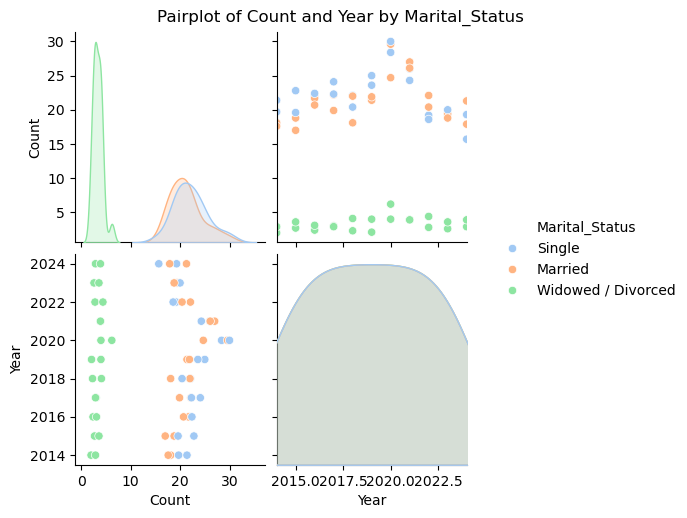

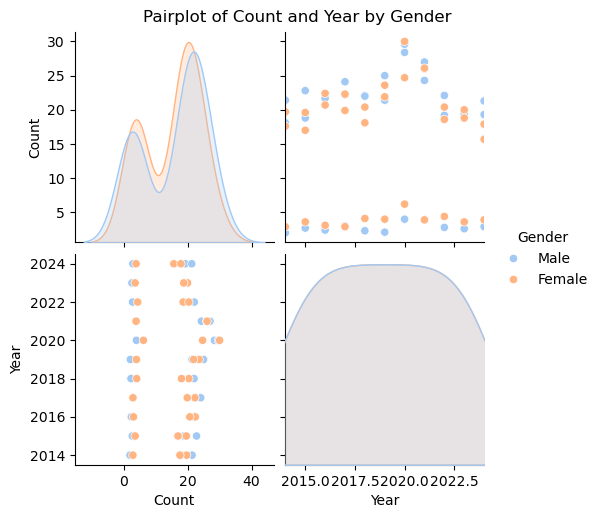

In [16]:
df_long['Year'] = pd.to_numeric(df_long['Year'])

print(cat_list)
for col in cat_list:
    sns.pairplot(df_long, 
                vars=['Count', 'Year'],  
                hue=col,    # This will color points 
                palette='pastel' #,
                #markers=["o", "s", "D"]
                ) 
    
    plt.xlim(2014, 2024)  # Set x-axis limit from 2014 to 2024
    
    plt.suptitle(f"Pairplot of Count and Year by {col}", y=1.02)
    plt.show();


[('Marital_Status', 'Gender')]


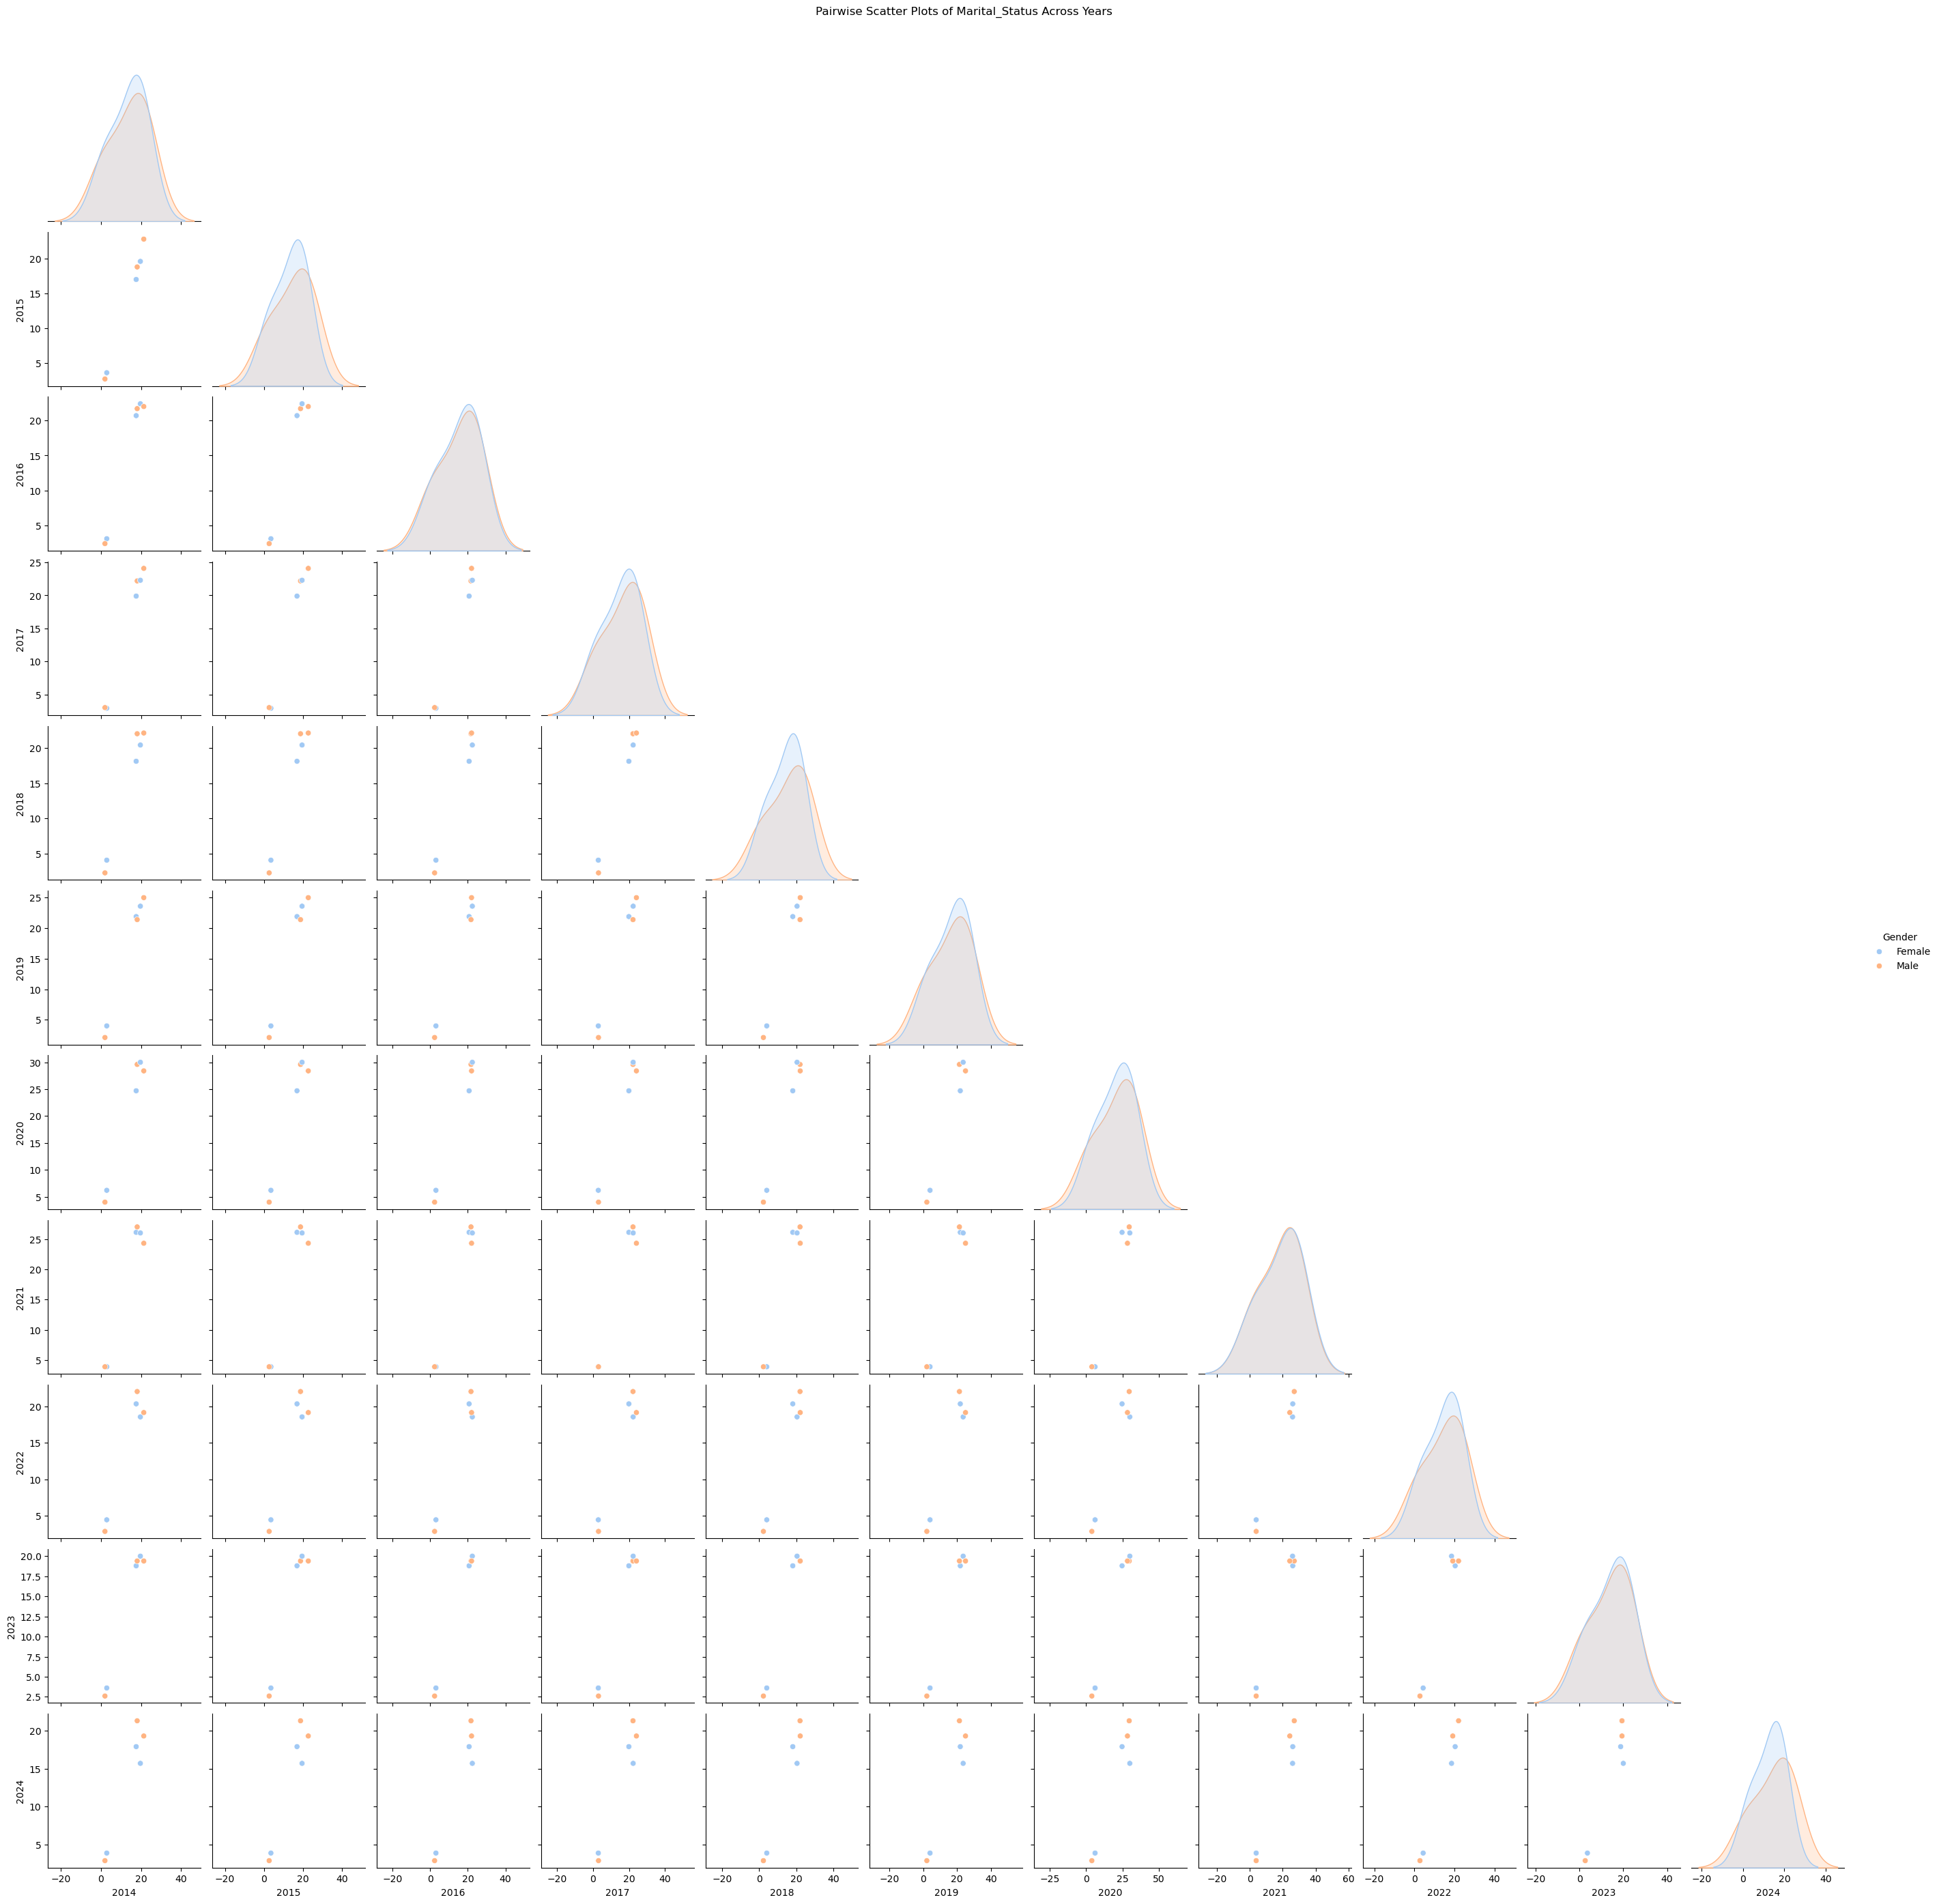

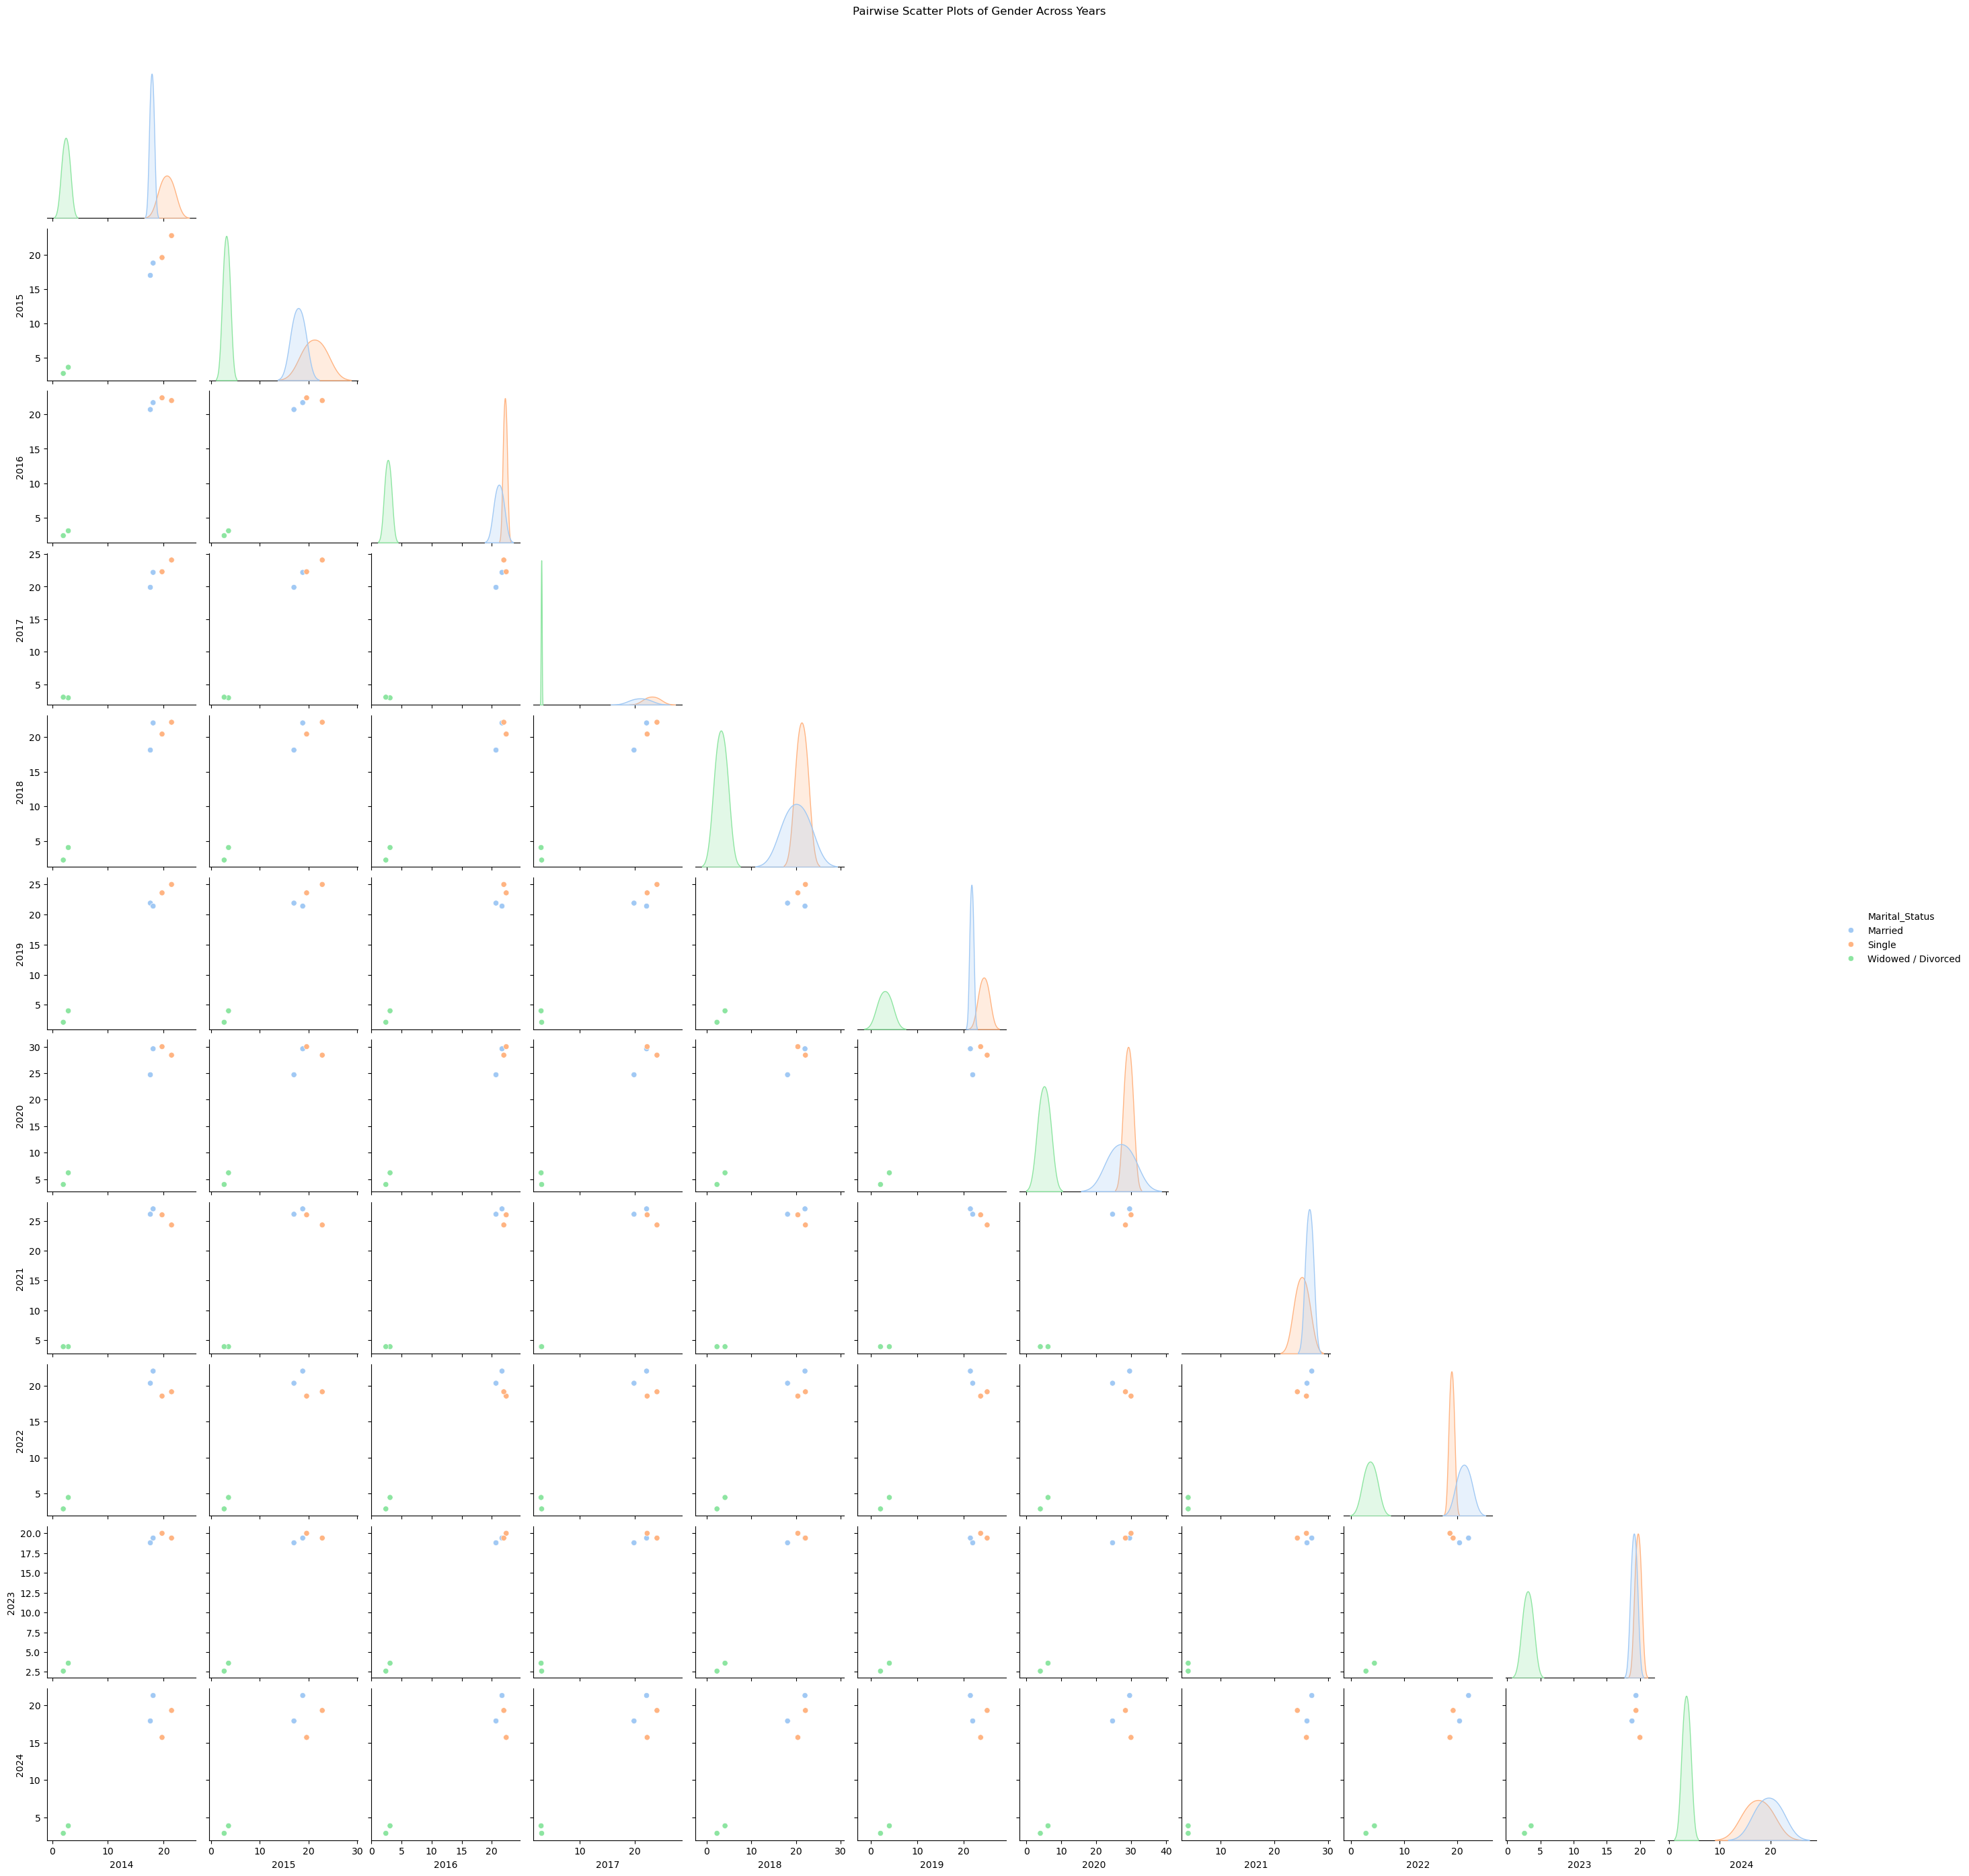

In [17]:
combo_list = list(combinations(cat_list, 2)) 
print(combo_list)

for combo in combo_list:
    
    wide_df = df_long.pivot_table(index=[combo[0],combo[1]], columns="Year", values="Count", aggfunc="mean").reset_index()
    #print(wide_df)
    sns.pairplot(wide_df, 
                 hue=combo[1],  
                 palette='pastel',
                 corner=True)  
    plt.suptitle(f"Pairwise Scatter Plots of {combo[0]} Across Years", y=1.02)
    plt.show()

    sns.pairplot(wide_df, 
                 hue=combo[0],  
                 palette='pastel',
                 corner=True)  
    plt.suptitle(f"Pairwise Scatter Plots of {combo[1]} Across Years", y=1.02)
    plt.show();